In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')


In [77]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


/tmp/ipykernel_35/4143324588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

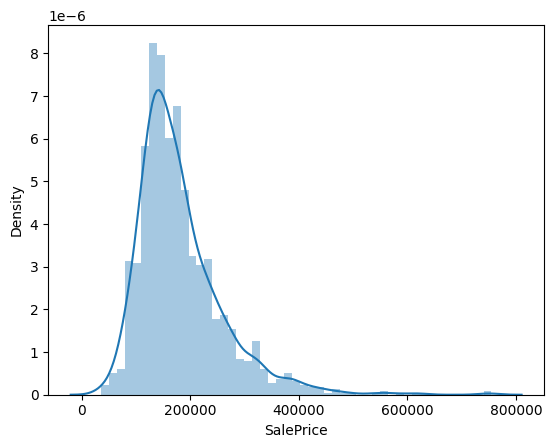

In [78]:
sns.distplot(df["SalePrice"])

In [79]:
df.select_dtypes(include='number').corr()['SalePrice'].sort_values()


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

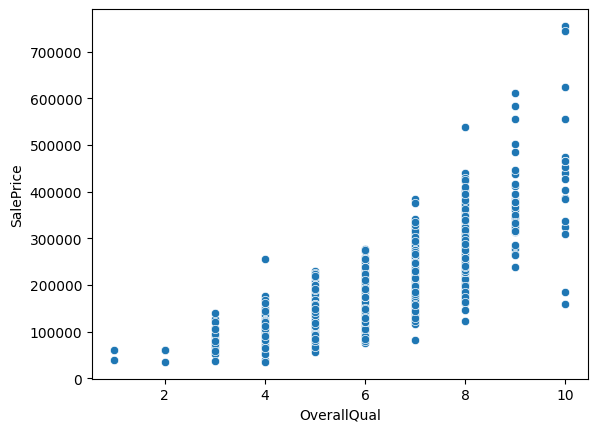

In [80]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

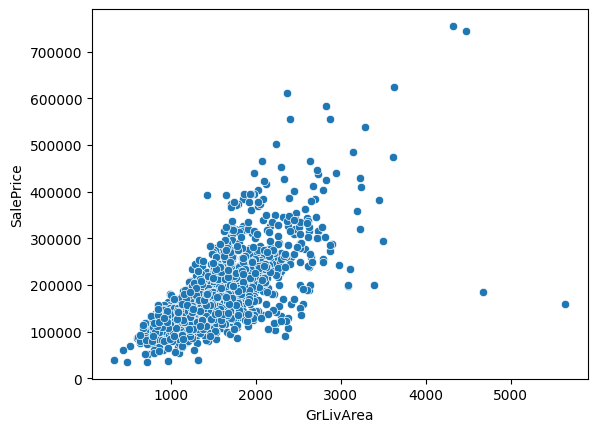

In [81]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

In [82]:
ind_drop = df[(df['GrLivArea']>4000) & (df['SalePrice']<400000)].index

In [83]:
df = df.drop(ind_drop,axis=0)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

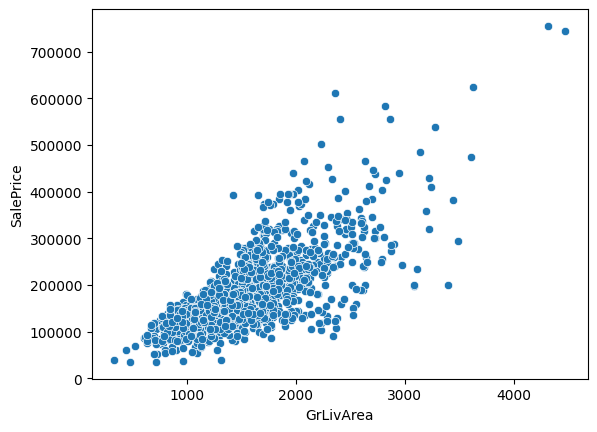

In [84]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

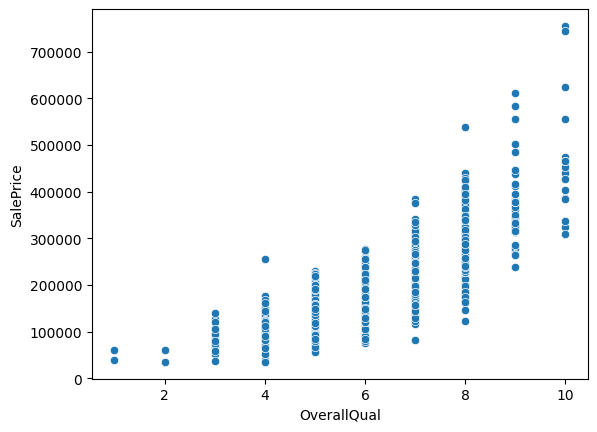

In [85]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df)

In [86]:
df = df.drop('Id',axis=1)

In [87]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1367
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1177
MiscFeature     1404
dtype: int64

In [88]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [89]:
percent_nan = percent_missing(df)

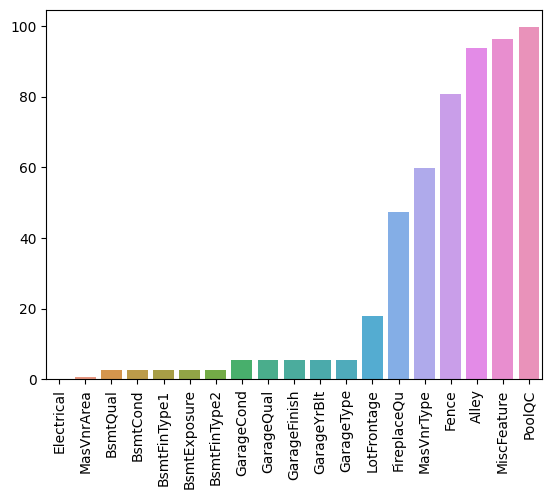

In [90]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

(0.0, 1.0)

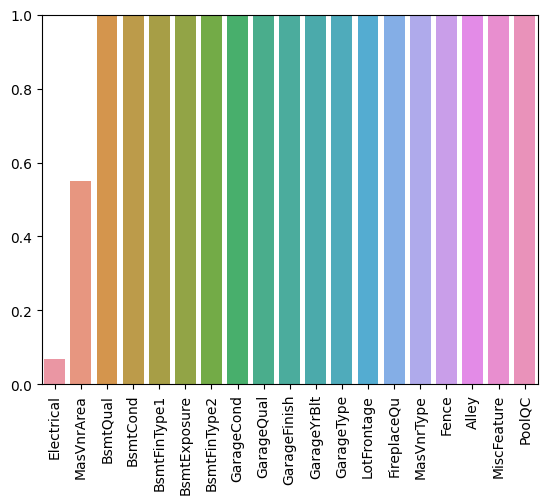

In [91]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [92]:
percent_nan[percent_nan < 1]

Electrical    0.068587
MasVnrArea    0.548697
dtype: float64

In [93]:
df = df[df['Electrical'].notnull()]

In [94]:
df.dropna(subset=['Electrical'], inplace=True)

In [95]:
df['Electrical'].isnull().sum()  


0

In [96]:

df[df['MasVnrArea'].isnull()]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [97]:
df['MasVnrArea'].fillna(0, inplace=True)




/tmp/ipykernel_35/2749286694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrArea'].fillna(0, inplace=True)


In [98]:
df['MasVnrArea'].isnull().sum()  

0

In [99]:
percent_nan = percent_missing(df)

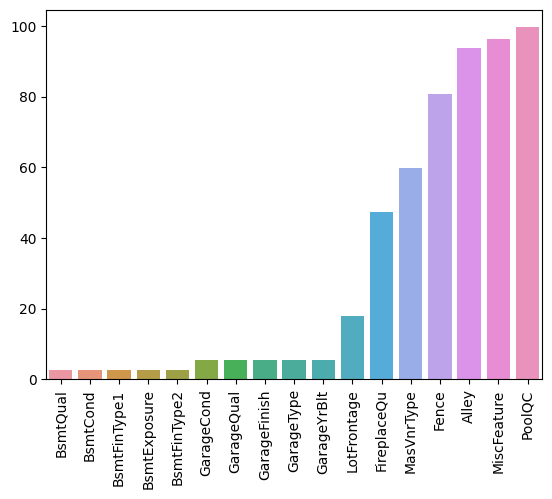

In [100]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [101]:
bsmt_num_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna('None')

 

In [102]:
gar_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [103]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [104]:
df[['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature','PoolQC', 'MasVnrType']]

,LotFrontage,FireplaceQu,Fence,Alley,MiscFeature,PoolQC,MasVnrType
0,65.0,NaN,NaN,NaN,NaN,NaN,BrkFace
1,80.0,TA,NaN,NaN,NaN,NaN,NaN
2,68.0,TA,NaN,NaN,NaN,NaN,BrkFace
3,60.0,Gd,NaN,NaN,NaN,NaN,NaN
4,84.0,TA,NaN,NaN,NaN,NaN,BrkFace
...,...,...,...,...,...,...,...
1455,62.0,TA,NaN,NaN,NaN,NaN,NaN
1456,85.0,TA,MnPrv,NaN,NaN,NaN,Stone
1457,66.0,Gd,GdPrv,NaN,Shed,NaN,NaN
1458,68.0,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
percent_nan = percent_missing(df)

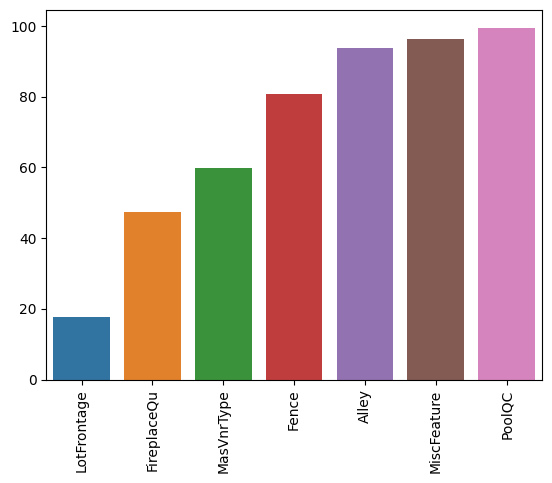

In [106]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [107]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [108]:
df['MasVnrType'].fillna('None', inplace=True)
df['FireplaceQu'] = df['FireplaceQu'].fillna("None")


/tmp/ipykernel_35/2804678850.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrType'].fillna('None', inplace=True)


In [109]:
percent_nan = percent_missing(df)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


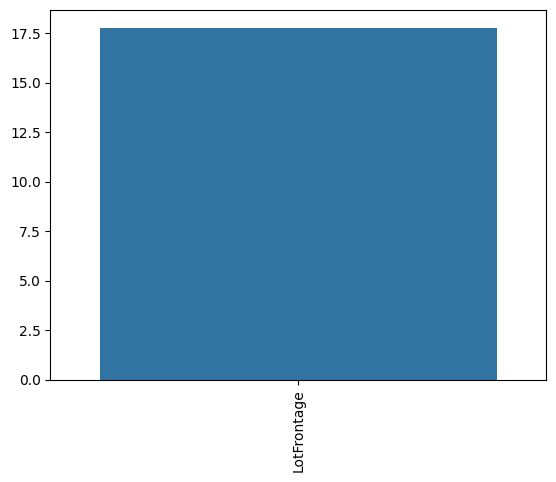

In [110]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [111]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


In [112]:

df['MSSubClass'] = df['MSSubClass'].apply(str)

In [113]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [114]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [115]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [116]:
final_df.corr()['SalePrice'].sort_values()

ExterQual_TA       -0.589947
KitchenQual_TA     -0.520124
FireplaceQu_None   -0.472413
BsmtQual_TA        -0.453018
GarageFinish_Unf   -0.411144
                      ...   
GarageCars          0.641111
TotalBsmtSF         0.651553
GrLivArea           0.734962
OverallQual         0.795863
SalePrice           1.000000
Name: SalePrice, Length: 259, dtype: float64

In [117]:
final_df['SalePrice_log'] = np.log1p(final_df['SalePrice'])

In [118]:
X = final_df.drop('SalePrice_log',axis=1)
y = final_df['SalePrice_log']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
from sklearn.linear_model import ElasticNet

In [120]:
base_elastic_model = ElasticNet()

In [121]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5)

In [124]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [125]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [126]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [127]:
y_pred = grid_model.predict(X_test)

In [128]:
from sklearn.metrics import mean_squared_error

In [129]:
mean_squared_error(y_test,y_pred)

0.009287497599237495

In [130]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")


RMSE: 0.10


In [131]:
df['SalePrice'].mean()

180942.13864104325

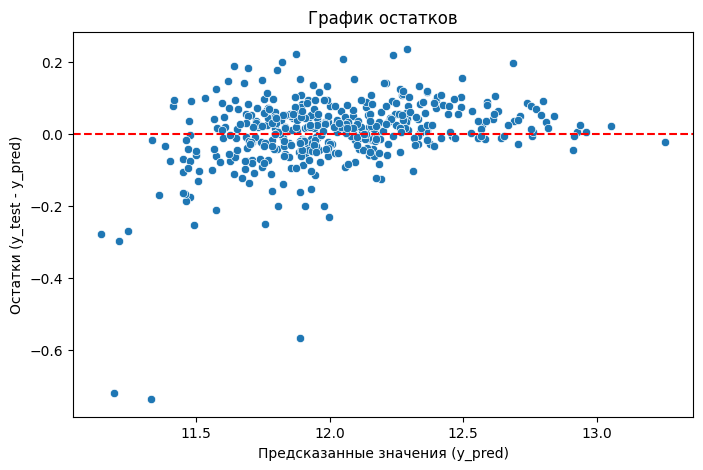

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Предсказанные значения (y_pred)")
plt.ylabel("Остатки (y_test - y_pred)")
plt.title("График остатков")
plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice_log', ylabel='Count'>

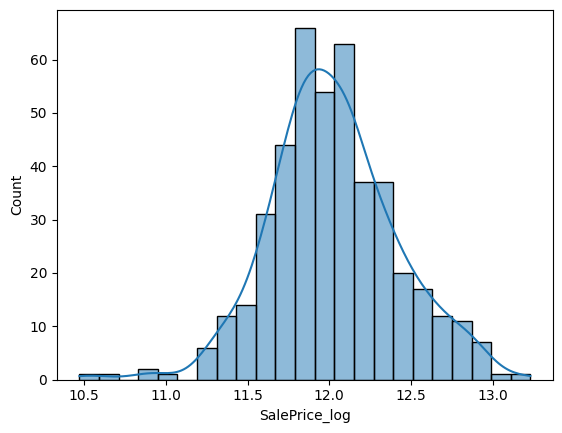

In [133]:
sns.histplot(y_test, kde=True)


In [136]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


In [137]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3)
xgb_model.fit(X_train, y_train,
              early_stopping_rounds=10,
              eval_set=[(X_test, y_test)],
              verbose=False)


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [138]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_xgb = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse:.4f}")


XGBoost RMSE: 0.0152


In [141]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV





In [142]:
param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [143]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_xgb = GridSearchCV(estimator=xgb,
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error',
                        cv=3,
                        verbose=1,
                        n_jobs=-1)

grid_xgb.fit(X_train, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5], 'n_estimators': [500, 1000],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [144]:
from sklearn.metrics import mean_squared_error
import numpy as np

best_model = grid_xgb.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Best XGBoost RMSE: {rmse:.4f}")
print("Best parameters:", grid_xgb.best_params_)


Best XGBoost RMSE: 0.0128
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}


In [139]:
# === 1. Чтение теста и сохранение Id
test_raw = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_ids = test_raw['Id']
test = test_raw.drop('Id', axis=1)

# === 2. Преобразования
test.dropna(subset=['Electrical'], inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)

bsmt_num_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2']
test[bsmt_num_cols] = test[bsmt_num_cols].fillna('None')

gar_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
test[gar_str_cols] = test[gar_str_cols].fillna('None')

test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
test['MasVnrType'].fillna('None', inplace=True)
test['FireplaceQu'] = test['FireplaceQu'].fillna("None")
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test['MSSubClass'] = test['MSSubClass'].apply(str)

# === 3. Объединение числовых и категориальных признаков
test_nums = test.select_dtypes(exclude='object')
test_objs = test.select_dtypes(include='object')
test_objs = pd.get_dummies(test_objs, drop_first=True)
final_test = pd.concat([test_nums, test_objs], axis=1)



/tmp/ipykernel_35/3672412682.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['MasVnrArea'].fillna(0, inplace=True)
/tmp/ipykernel_35/3672412682.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [135]:
#print(submission.head())
#print(submission.shape)

In [145]:
final_test_xgb = final_test.reindex(columns=X.columns, fill_value=0)

predictions_log = grid_xgb.predict(final_test_xgb)
predictions = np.expm1(predictions_log)

submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': predictions
})
submission.to_csv('submission.csv', index=False)